In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
from keras.preprocessing import image

In [4]:
dfTrainY = pd.read_csv('Train/train.csv')

In [26]:
label_dict = {'Pikachu': 0, 'Charmander': 1, 'Bulbasaur': 2}

In [5]:
dfTrainY.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [6]:
p = Path('../../Scripts/MultiClassClassification/Train/Images/')

In [17]:
ls = p.glob("*.jpg")
image_data = []
for img_path in ls:
    img = image.load_img(img_path, target_size=((32, 32)))
    img_arr = image.img_to_array(img)
    image_data.append(img_arr)

C:\Users\hhars\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
image_data = np.asarray(image_data, dtype='float32')/255.0

In [19]:
image_data

array([[[[0.57254905, 0.7490196 , 0.9098039 ],
         [0.5803922 , 0.7490196 , 0.9137255 ],
         [0.58431375, 0.75686276, 0.9098039 ],
         ...,
         [0.6039216 , 0.76862746, 0.91764706],
         [0.59607846, 0.76862746, 0.9137255 ],
         [0.5882353 , 0.75686276, 0.92156863]],

        [[0.58431375, 0.75686276, 0.9098039 ],
         [0.59607846, 0.76862746, 0.92156863],
         [0.59607846, 0.76862746, 0.9137255 ],
         ...,
         [0.62352943, 0.78039217, 0.92156863],
         [0.6039216 , 0.77254903, 0.9098039 ],
         [0.59607846, 0.76862746, 0.9137255 ]],

        [[0.58431375, 0.7529412 , 0.91764706],
         [0.5882353 , 0.7607843 , 0.9137255 ],
         [0.59607846, 0.76862746, 0.9137255 ],
         ...,
         [0.627451  , 0.78431374, 0.92156863],
         [0.6117647 , 0.78039217, 0.91764706],
         [0.59607846, 0.76862746, 0.9137255 ]],

        ...,

        [[0.32156864, 0.5568628 , 0.83137256],
         [0.30980393, 0.54509807, 0.827451  ]

In [20]:
m = image_data.shape[0]
image_data = image_data.reshape((m,-1))

In [21]:
image_data.shape

(304, 3072)

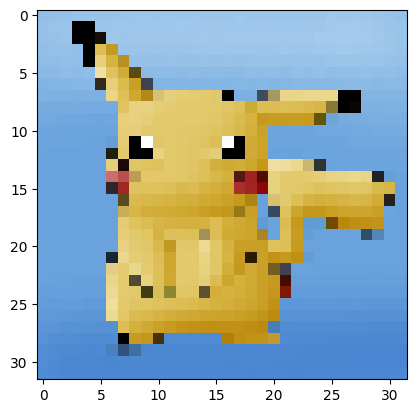

In [22]:
plt.imshow(image_data[0].reshape((32, 32, -1)))

In [23]:
np.unique(dfTrainY.iloc[:, 1], return_counts=True)

(array(['Bulbasaur', 'Charmander', 'Pikachu'], dtype=object),
 array([101, 102, 101], dtype=int64))

In [25]:
dfTrainY

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu
...,...,...
299,616.jpg,Charmander
300,617.jpg,Charmander
301,618.jpg,Charmander
302,619.jpg,Charmander


In [27]:
dataTrainY = dfTrainY.values

In [30]:
trainY = [label_dict[w] for w in dataTrainY[:,1]]

In [37]:
trainY = np.asarray(trainY)
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
image_data.shape

(304, 3072)

In [40]:
import random
combined = list(zip(image_data, trainY))
random.shuffle(combined)
image_data[:], trainY[:] = zip(*combined)

In [59]:
class SVM:
    def __init__(self, c=1.0):
        self.c = c
        self.w = 0
        self.b = 0

    def hingeLoss(self, X, Y, w, b):
        err = 0.5 * np.dot(w, w.T)
        for i in range(X.shape[0]):
            ti = Y[i] * (np.dot(X[i], w) + b)
            err += self.c * max(0, 1 - ti)
        return err

    def fit(self, X, Y, alpha=0.001, maxIters=300, batch_size=100):
        m, n = X.shape[0], X.shape[1]
        w = np.zeros(n)
        b = 0
        c = self.c
        losses = []
        for i in range(maxIters):
            ids = np.arange(m)
            np.random.shuffle(ids)
            loss = self.hingeLoss(X, Y, w, b)
            losses.append(loss)
            for b in range(0, m, batch_size):
                gradw = 0
                gradb = 0
                for j in range(b, b + batch_size):
                    if j < m:
                        k = ids[j]
                        ti = Y[k] * (np.dot(X[k], w) + b)
                        if ti < 1:
                            gradw += c * Y[k] * X[k]
                            gradb += c * Y[k]

                w = w - alpha * w + alpha * gradw
                b = b + alpha * gradb
        self.b = b
        self.w = w
        return self.b, self.w, losses
                        

In [64]:
svm = SVM()
b, w, losses = svm.fit(image_data, trainY, maxIters=1000, alpha=0.0001, batch_size=200)

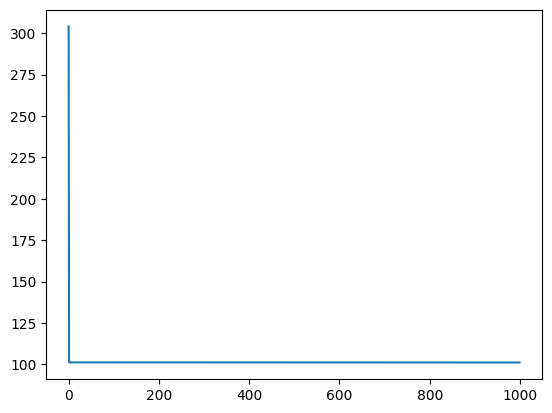

In [65]:
plt.plot(losses)

In [73]:
classes = len(np.unique(trainY))
def classWiseData(x, y):
    data = {}
    for i in range(classes):
        data[i] = []

    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k] = np.array(data[k])
    return data

data = classWiseData(image_data, trainY)
data[2].shape[0]

101

In [129]:
def getPairWiseData(d1, d2):
    l1, l2 = d1.shape[0], d2.shape[0]
    samples = l1 + l2
    features = d1.shape[1]
    data_pairs = np.zeros((samples, features))
    data_lables = np.zeros((samples,))
    data_pairs[:l1] = d1
    data_pairs[l1:] = d2

    data_lables[:l1] = -1
    data_lables[l1:] = 1
    return data_pairs, data_lables

In [131]:
cls = len(np.unique(trainY))
def trainSVMs(x, y):
    svmClassifiers = {}
    for i in range(cls):
        svmClassifiers[i] = {}
        for j in range(i + 1, cls):
            nx, ny = getPairWiseData(data[i], data[j])
            mysvm = SVM()
            b, wt, losses = mysvm.fit(nx, ny, maxIters=4500, alpha=0.0001)
            svmClassifiers[i][j] = (b, wt)
            plt.plot(losses)
            plt.show()
    return svmClassifiers

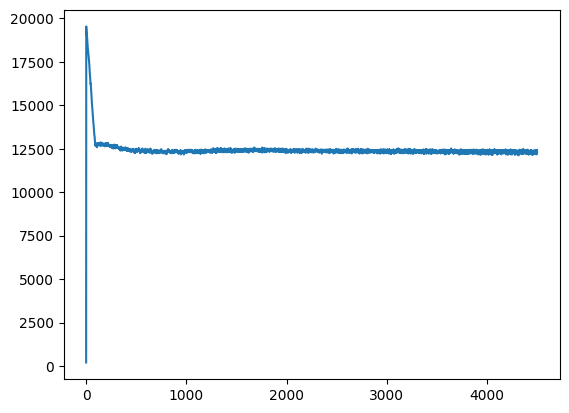

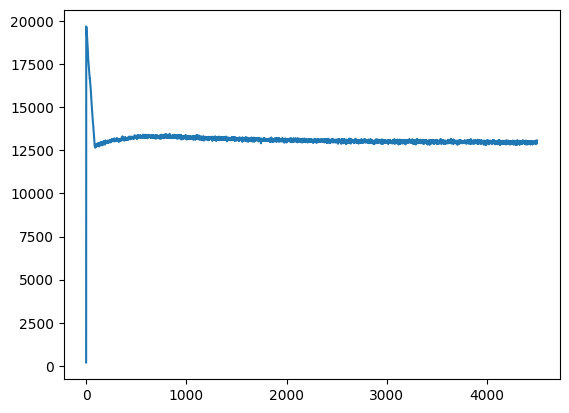

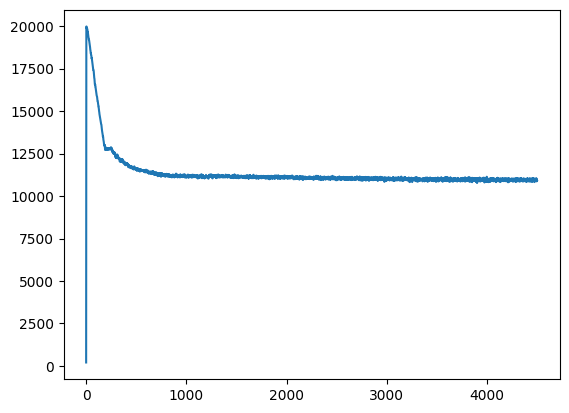

In [132]:
svmClassifiers = trainSVMs(image_data, trainY)

In [133]:
print(svmClassifiers[0][1])
print(svmClassifiers[0][2])
print(svmClassifiers[1][2])

(199.9999, array([-0.05195224, -0.07658289,  0.08646271, ..., -0.10315073,
       -0.09781695,  0.12940654]))
(200.0, array([-0.06990957, -0.12596441, -0.16821791, ...,  0.1283668 ,
        0.11719685, -0.13213379]))
(199.9997, array([ 0.13203576,  0.01481748, -0.10304013, ...,  0.15544837,
        0.11807291, -0.1553467 ]))


In [134]:
def binaryPredict(x, w, b):
    z = np.dot(x, w.T) + b
    if z > 0: 
        return 1
    return -1

In [135]:
def predict(x):
    count = np.zeros((cls, ))
    for i in range(cls):
        for j in range(i + 1, cls):
            b, w = svmClassifiers[i][j]
            z = binaryPredict(x, w, b)
            if z == 1:
                count[j] += 1
            else:
                count[i] += 1
    return np.argmax(count)

In [136]:
def score(x, y):
    cnt = 0
    for i in range(x.shape[0]):
        cnt += (y[i] == predict(x[i]))
    print(cnt / y.shape[0])
score(image_data, trainY)

0.33223684210526316


In [137]:
from sklearn import svm

In [138]:
svm = svm.SVC()

In [139]:
svm.fit(image_data, trainY)

SVC()

In [140]:
svm.score(image_data, trainY)

0.6546052631578947

In [141]:
cnt = 0
y_ = svm.predict(image_data)
cnt += (y_ == trainY)

In [142]:
np.sum(cnt) / 304

0.6546052631578947